[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0
전체 샘플의 수 : 1797
0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


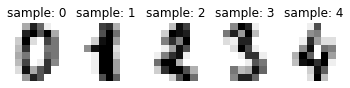

In [1]:
# MNIST 데이터 테스트

# 모듈 불러오기
%matplotlib inline
          # 이건머지???
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# MNIST 데이터 로드
digits = load_digits()

# 첫번째 샘플 픽셀값, 실제 레이블값, 샘플 수
print(digits.images[0]) # 8차원
print(digits.data[0]) # 8x8차원
print(digits.target[0])
print('전체 샘플의 수 : {}'.format(len(digits.images)))

# 5개 샘플 시각화
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 이건 머지???
    plt.subplot(2, 5, index + 1) # 이건 머지???
    plt.axis('off') # 축 제거
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest') # 이건 머지???
    plt.title('sample: %i' % label) # 이건머지???
    
# 5개 샘플 레이블 출력
for i in range(5):
    print(i, '번 인덱스 샘플의 레이블 : ', digits.target[i])

Eopch :    0/100, Cost : 2.524850
Eopch :   10/100, Cost : 2.171928
Eopch :   20/100, Cost : 1.874611
Eopch :   30/100, Cost : 1.567316
Eopch :   40/100, Cost : 1.199110
Eopch :   50/100, Cost : 0.844978
Eopch :   60/100, Cost : 0.579893
Eopch :   70/100, Cost : 0.409334
Eopch :   80/100, Cost : 0.310338
Eopch :   90/100, Cost : 0.247058


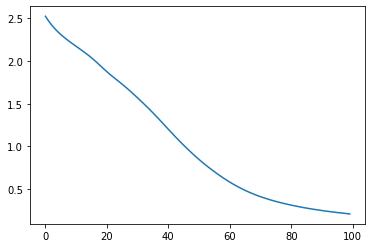

In [2]:
# MNIST 다층 퍼셉트론 분류

# 모듈 불러오기
import torch
import torch.nn as nn
from torch import optim

# 데이터(이미지 픽셀값, 이미지 레이블) 정의
X = digits.data
Y = digits.target
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

# 모델 정의
model = nn.Sequential(nn.Linear(64, 32), # input_layer : 64, hidden_layer1 : 32
                      nn.ReLU(), 
                      nn.Linear(32, 16), # input_layer : 32, hidden_layer1 : 16
                      nn.ReLU(), 
                      nn.Linear(16,10)) # input_layer : 16, hidden_layer1 : 10

# 손실함수 정의
loss_fn = nn.CrossEntropyLoss() # 이 손실함수는 소프트맥스 함수 포함

# 최적화 함수 정의
optimizer = optim.Adam(model.parameters())

# 그래프 그리기 위한 list
losses = []

for epoch in range(100):
    # 최적화 함수 초기화
    optimizer.zero_grad()
    
    # 학습
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    
    # 출력
    if epoch % 10 == 0:
        print('Eopch : {:4d}/{}, Cost : {:.6f}'.format(epoch, 100, loss.item()))
    
    # 그래프 그리기 위한 list
    losses.append(loss.item())

# 손실함수 그래프 작도
plt.plot(losses)